Попробуйте улучшить работу нейронной сети(берем простую линейную сеть, которую разбиращли на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) обучавшейся на датасет Fashion-MNIST. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np

2.3.0


In [2]:
print("GPU: ", end=''),
print(tf.config.experimental.list_physical_devices("GPU"))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [5]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [6]:
#train_images = train_images.reshape((-1, train_images.shape[1] * train_images.shape[2]))
#test_images = test_images.reshape((-1, test_images.shape[1] * test_images.shape[2]))

#train_images = train_images.reshape(60000,28,28,1)
#test_images = test_images.reshape(10000,28,28,1)

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
def conversion_in_one_class(data, class_variable):
    result = data.copy()
    if class_variable in result:
        for i in range(len(result)):
            if result[i] == class_variable:
                result[i] = 1
            else:
                result[i] = 0
    else:
        raise Exception('лень')
    
    return result

In [9]:
print(train_labels)

'''
class_0 = conversion_in_one_class(train_labels, 0)
class_1 = conversion_in_one_class(train_labels, 1)
class_2 = conversion_in_one_class(train_labels, 2)
class_3 = conversion_in_one_class(train_labels, 3)
class_4 = conversion_in_one_class(train_labels, 4)
class_5 = conversion_in_one_class(train_labels, 5)
class_6 = conversion_in_one_class(train_labels, 6)
class_7 = conversion_in_one_class(train_labels, 7)
class_8 = conversion_in_one_class(train_labels, 8)
class_9 = conversion_in_one_class(train_labels, 9)

print(class_0)
print(class_1)
print(class_2)
print(class_3)
print(class_4)
print(class_5)
print(class_6)
print(class_7)
print(class_8)
print(class_9)'''

[9 0 0 ... 3 0 5]


'\nclass_0 = conversion_in_one_class(train_labels, 0)\nclass_1 = conversion_in_one_class(train_labels, 1)\nclass_2 = conversion_in_one_class(train_labels, 2)\nclass_3 = conversion_in_one_class(train_labels, 3)\nclass_4 = conversion_in_one_class(train_labels, 4)\nclass_5 = conversion_in_one_class(train_labels, 5)\nclass_6 = conversion_in_one_class(train_labels, 6)\nclass_7 = conversion_in_one_class(train_labels, 7)\nclass_8 = conversion_in_one_class(train_labels, 8)\nclass_9 = conversion_in_one_class(train_labels, 9)\n\nprint(class_0)\nprint(class_1)\nprint(class_2)\nprint(class_3)\nprint(class_4)\nprint(class_5)\nprint(class_6)\nprint(class_7)\nprint(class_8)\nprint(class_9)'

In [10]:
import tensorflow.keras.layers as layer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = [20, 7]

In [11]:
def model_compile(_input_, _output_, statistic=dict(), num_test=0, repeat=5, batch_size=1000, epochs=10, note=''):
    
    statistic_out = dict()
    history_list = dict()

    max_accuracy = 0
    max_val_accuracy = 0

    for i in range(repeat):
        model = Model(inputs=_input_,outputs=_output_)
        
        if i == 0:
            model.summary()

        model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

        history = model.fit(
            train_images, 
            to_categorical(train_labels,10),
            epochs=epochs,
            batch_size=batch_size,
            validation_split = 0.2, 
            verbose=0
        )
        
        history_list[i] = history.history

        if(history.history["val_accuracy"][-1] > max_val_accuracy):
            max_val_accuracy = history.history["val_accuracy"][-1]
            max_accuracy = history.history["accuracy"][-1]
        
        print(f'accuracy: {history.history["accuracy"][-1]}, val_accuracy: {history.history["val_accuracy"][-1]}')

    for i in range(len(history_list)):
        plt.plot(history_list[i]['val_accuracy'], "--",label=f'val_{i}')
        plt.plot(history_list[i]['accuracy'], label=f'train_{i}')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('точность сети от эпох')
    plt.show()

    statistic_out['val_accuracy'] = max_val_accuracy
    statistic_out['accuracy'] = max_accuracy
    statistic_out['note'] = note

    statistic[num_test] = statistic_out

    return statistic

num_test = 0
statistic=dict()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.8926666378974915, val_accuracy: 0.8766666650772095
accuracy: 0.9240833520889282, val_accuracy: 0.8767499923706055
accuracy: 0.9427083134651184, val_accuracy: 0.8947499990463257
accuracy: 0.9570208191871643, val_accuracy: 0.89341664314

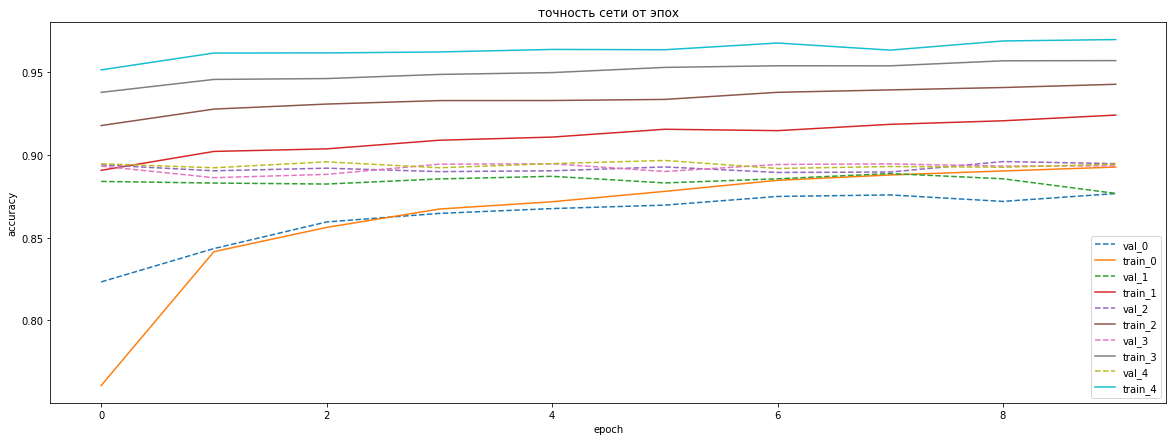

CPU times: user 14.4 s, sys: 1.8 s, total: 16.2 s
Wall time: 12.6 s


In [12]:
%%time
#тест 1
#Запустим сеть как на уроке раз 5
input = layer.Input(shape=(28, 28, 1))

x = layer.Flatten()(input)
x = layer.Dense(512, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

num_test = 1
statistic = model_compile(input, x, note='Изначальная сеть', num_test=num_test, statistic=statistic)

In [13]:
#0.89 на валидационной выборке

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.8874791860580444, val_accuracy: 0.8734166622161865
accuracy: 0.9127291440963745, val_accuracy: 0.8868333101272583
accuracy: 0.9307083487510681, val_accuracy: 0.8918333053588867
accuracy: 0.9447291493415833, val_accuracy: 0.8911666870

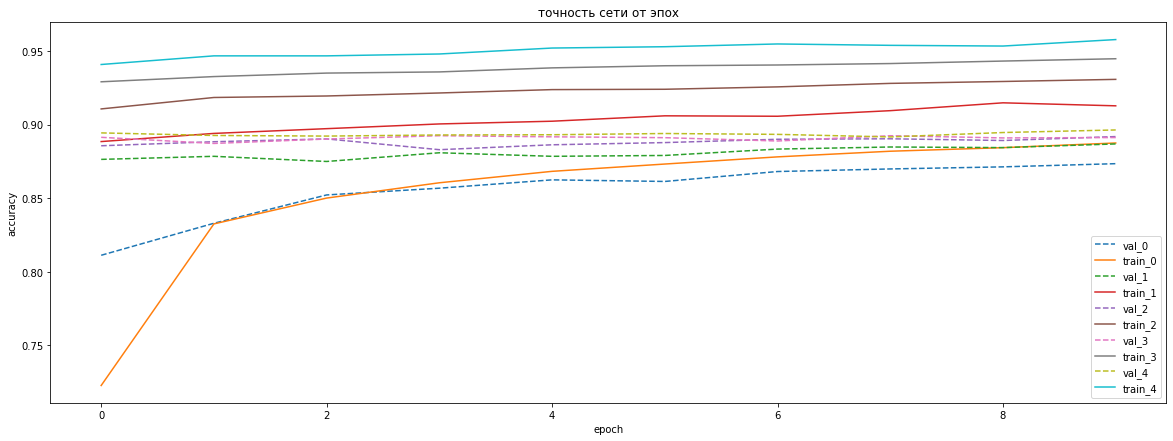

CPU times: user 13.5 s, sys: 1.47 s, total: 14.9 s
Wall time: 11.4 s


In [14]:
%%time
#Уменьшим кол-во нейронов
input = layer.Input(shape=(28, 28, 1))

x = layer.Flatten()(input)
x = layer.Dense(256, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

num_test = 2
statistic = model_compile(input, x, note='Уменьшил кол-во нейронов', num_test=num_test, statistic=statistic)

In [15]:
#Без изменений

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.9079166650772095, val_accuracy: 0.8865833282470703
accuracy: 0.9382916688919067, val_accuracy: 0.8950833082199097
accuracy: 0.9613541960716248, val_accuracy: 0.8934166431427002
accuracy: 0.9768750071525574, val_accuracy: 0.897249

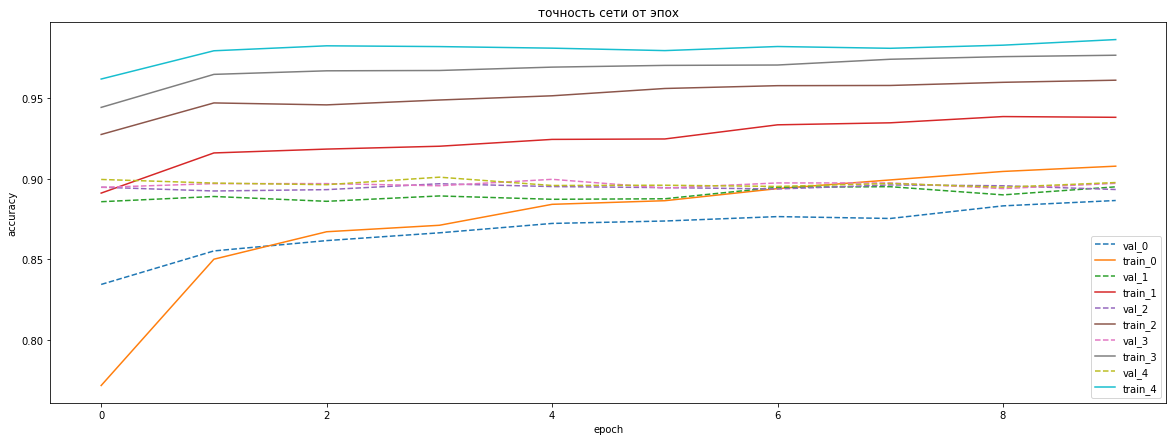

CPU times: user 14.9 s, sys: 2 s, total: 16.9 s
Wall time: 13.2 s


In [16]:
%%time
#увеличил кол-во нейронов
input = layer.Input(shape=(28, 28, 1))

x = layer.Flatten()(input)
x = layer.Dense(2048, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)


num_test = 3
statistic = model_compile(input, x, note='Уменьшил кол-во нейронов', num_test=num_test, statistic=statistic)

In [17]:
#Точность на тестовой конечно выросла, но на  валидационной все также плохо

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 4,765,706
Trainable params: 4,765,706
Non-trainable params: 0
___________________________________________

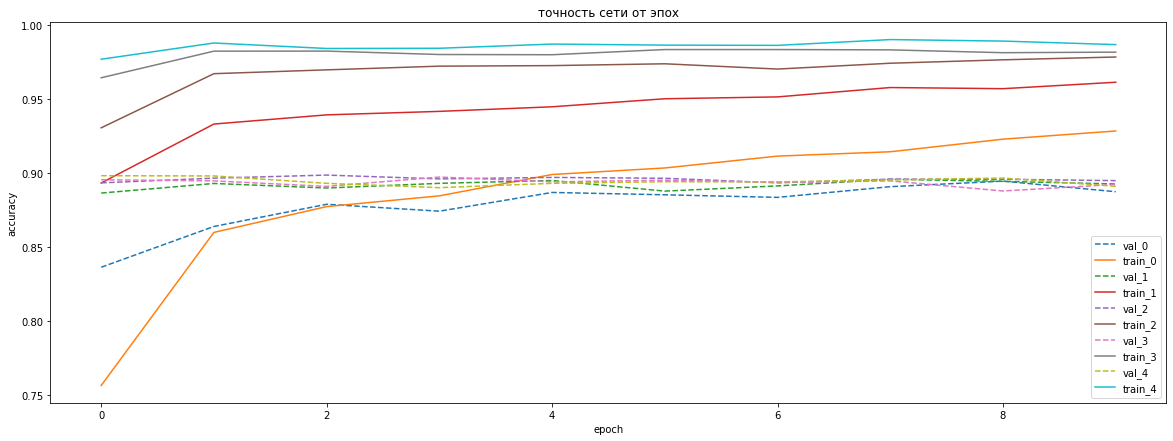

CPU times: user 23 s, sys: 7.44 s, total: 30.4 s
Wall time: 25.8 s


In [18]:
%%time
#Добавил парочку слоёв
input = layer.Input(shape=(28, 28, 1))

x = layer.Flatten()(input)
x = layer.Dense(2048, activation='relu')(x)
x = layer.Dense(1024, activation='relu')(x)
x = layer.Dense(1024, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

num_test = 4
statistic = model_compile(input, x, note='Добавил парочку слоёв', num_test=num_test, statistic=statistic)

In [19]:
#Результат не меняется

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10250     
Total params: 4,765,706
Trainable params: 4,765,706
Non-trainable params: 0
___________________________________________

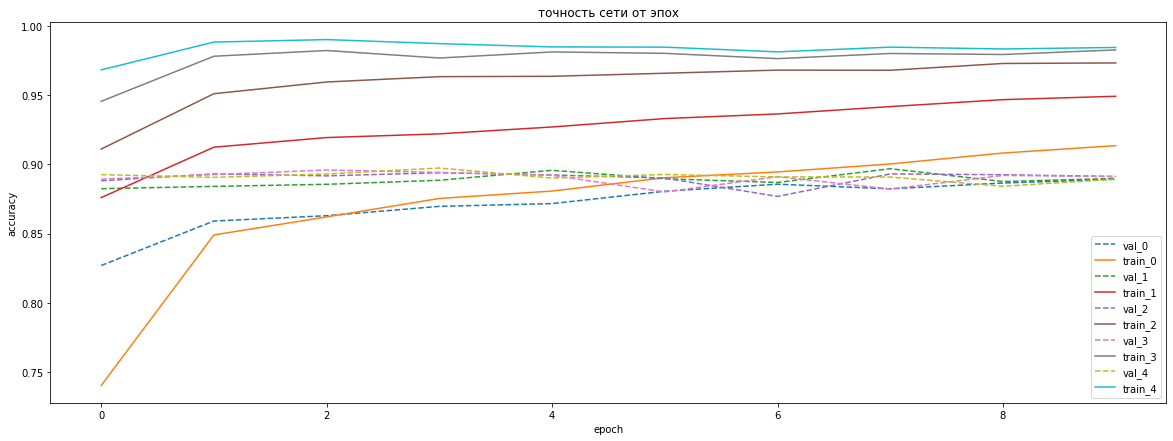

CPU times: user 22.5 s, sys: 7.41 s, total: 29.9 s
Wall time: 25.4 s


In [20]:
%%time
#поперебираем функции распределения
input = layer.Input(shape=(28, 28, 1))

x = layer.Flatten()(input)
x = layer.Dense(2048, activation='linear')(x)
x = layer.Dense(1024, activation='tanh')(x)
x = layer.Dense(1024, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

num_test = 5
statistic = model_compile(input, x, note='поперебираем функции распределения', num_test=num_test, statistic=statistic)

In [21]:
#Функции распределения практически не повлияли

Model: "functional_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.8601874709129333, val_accuracy: 0.8506666421890259
accuracy: 0.8585208058357239, val_accuracy: 0.847000002861023
accuracy: 0.863937497138977, val_accuracy: 0.8521666526794434
accuracy: 0.867520809173584, val_accuracy: 0.848166644

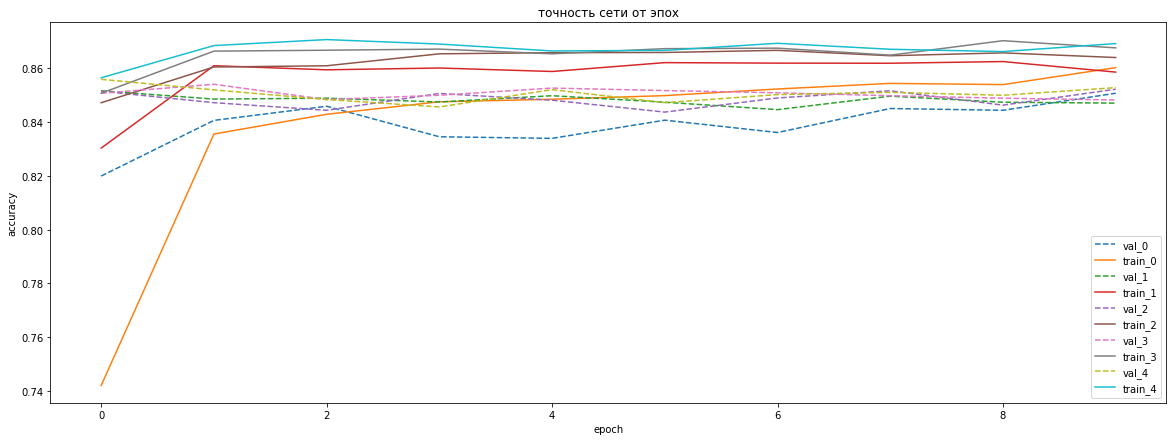

CPU times: user 13.7 s, sys: 1.78 s, total: 15.5 s
Wall time: 12 s


In [22]:
%%time
#Меняем функции распределения на одном слое
input = layer.Input(shape=(28, 28, 1))

x = layer.Flatten()(input)
x = layer.Dense(2048, activation='linear')(x)
x = layer.Dense(10, activation='softmax')(x)

num_test = 6
statistic = model_compile(input, x, note='Меняем функции распределения на одном слое (linear)', num_test=num_test, statistic=statistic)

In [23]:
#Хотябы отрицательное изменение получил

Model: "functional_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.8736041784286499, val_accuracy: 0.8655833601951599
accuracy: 0.9004166722297668, val_accuracy: 0.8744999766349792
accuracy: 0.9176250100135803, val_accuracy: 0.8851666450500488
accuracy: 0.9323958158493042, val_accuracy: 0.886500

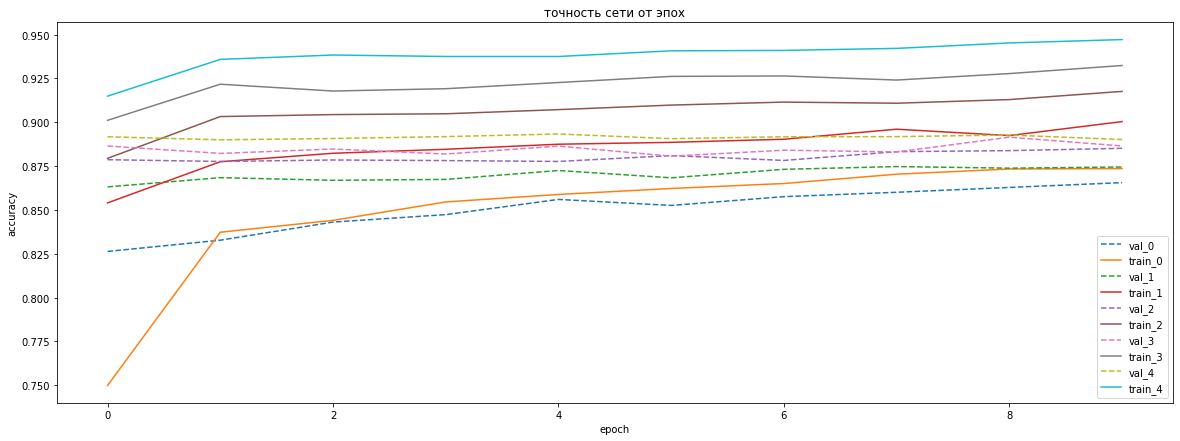

CPU times: user 14.1 s, sys: 2.07 s, total: 16.2 s
Wall time: 12.6 s


In [24]:
%%time
#Меняем функции распределения на одном слое
input = layer.Input(shape=(28, 28, 1))

x = layer.Flatten()(input)
x = layer.Dense(2048, activation='tanh')(x)
x = layer.Dense(10, activation='softmax')(x)

num_test = 7
statistic = model_compile(input, x, note='Меняем функции распределения на одном слое (tanh)', num_test=num_test, statistic=statistic)

In [25]:
#Изменений практически никаких

Model: "functional_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 12,851,018
Trainable params: 12,851,018
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.987416684627533, val_accuracy: 0.909333348274231
accuracy: 0.9965833425521851, val_accuracy: 0.

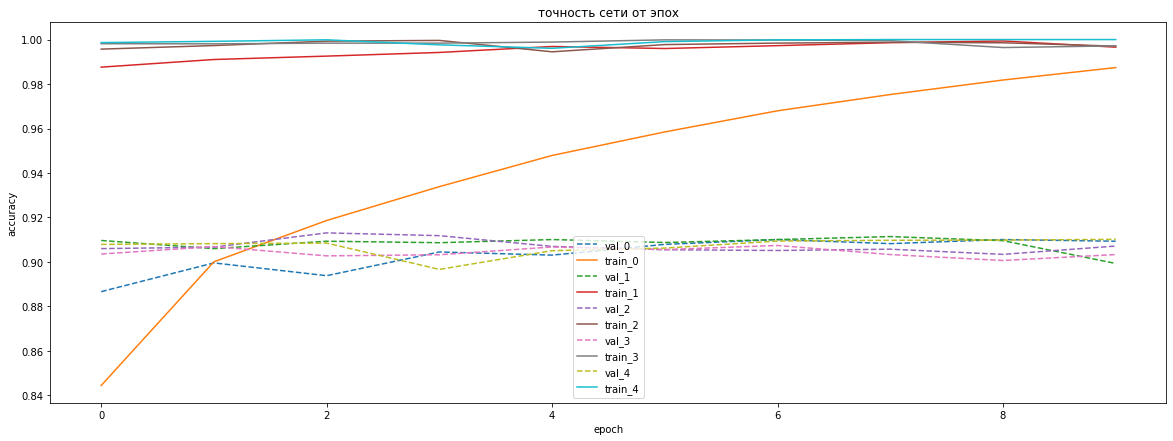

CPU times: user 43.4 s, sys: 8.25 s, total: 51.6 s
Wall time: 1min 58s


In [26]:
%%time
#Добавил сверточный слой, но уберем два полносвязных слоя, всеравно они не влияют на результат
#batch_size пришлось уменьшить, ругалось, что GPU такое переварить не в состоянии
input = layer.Input(shape=(28, 28, 1))

x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = layer.Flatten()(x)
x = layer.Dense(512, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

num_test = 8
statistic = model_compile(input, x, note='Добавил сверточный слой', num_test=num_test, statistic=statistic, batch_size=200)

In [27]:
#Вот это уже результат. Но оооочень тяжелая сеть и долго считает.

Model: "functional_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
accuracy: 0.9046458601951599, val_accuracy: 0.8791666626930237
accuracy: 0.9326666593551636, val_accuracy: 0.

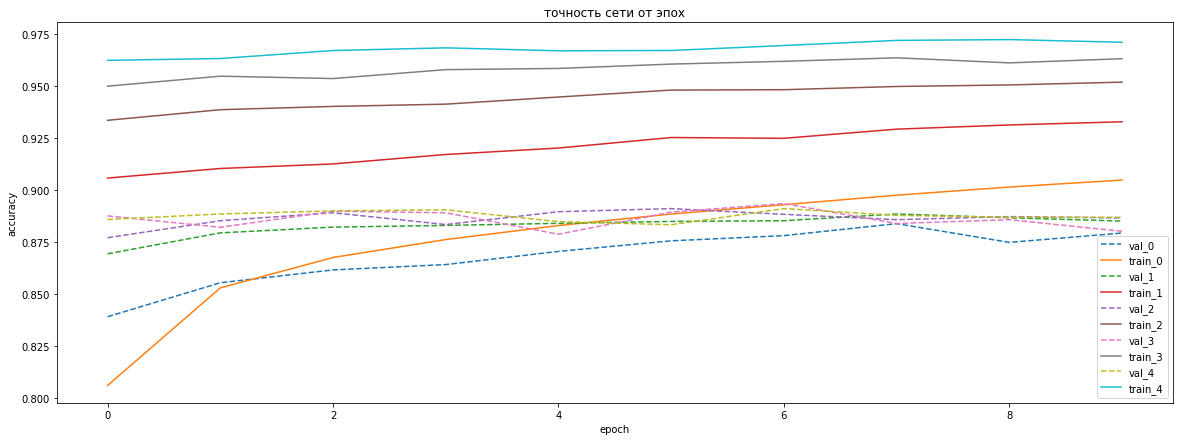

CPU times: user 31.2 s, sys: 4.87 s, total: 36.1 s
Wall time: 27.5 s


In [28]:
%%time
#Посмотрим на макспулинг
input = layer.Input(shape=(28, 28, 1))

x = layer.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(input)
x = layer.Flatten()(x)
x = layer.Dense(2048, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

num_test = 9
statistic = model_compile(input, x, note='Добавил макспулинг', num_test=num_test, statistic=statistic, batch_size=200)

In [29]:
#голый макспулинг ухудшил результат

Model: "functional_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 12,851,018
Trainable params: 12,851,018
Non-trainable params: 0
_________________________________________

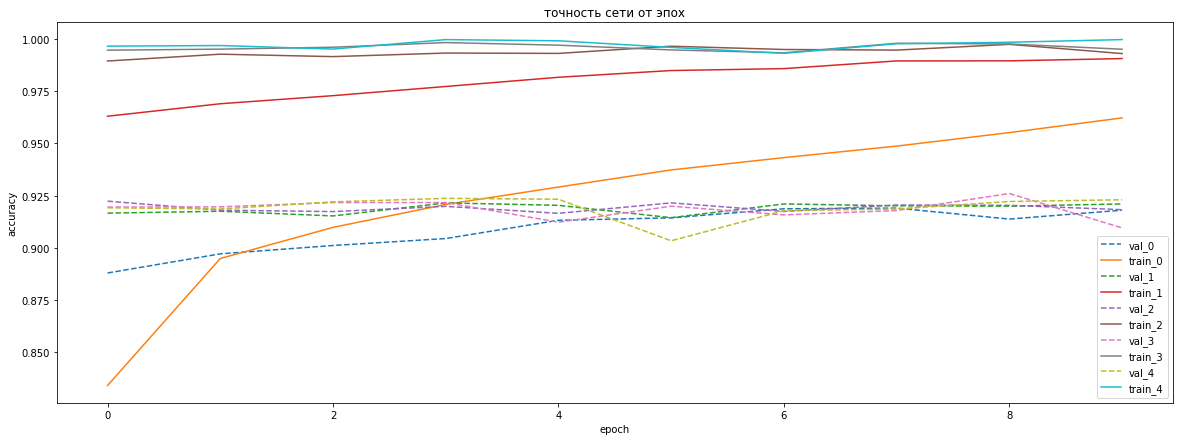

CPU times: user 42.3 s, sys: 7.97 s, total: 50.2 s
Wall time: 2min 7s


In [30]:
%%time
#Сверточный слой и макспулинг
input = layer.Input(shape=(28, 28, 1))

x = layer.Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = layer.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
x = layer.Flatten()(x)
x = layer.Dense(512, activation='relu')(x)
x = layer.Dense(10, activation='softmax')(x)

num_test = 10
statistic = model_compile(input, x, note='Сверточный слой и макспулинг', num_test=num_test, statistic=statistic, batch_size=200)

In [31]:
#Перепробовал несколько вариантов. Такое чувство, что для полносвязных слоев уперся в потолок. Меняю параметры, а глобально ничего не меняется.
#оптимальным получается 1 слой с 1024 нейронами, замена функции активации практически дело не меняет. 
#только добавление сверточных слоев меняет ситуацию. особенно в последнем результате.

Model: "functional_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 28)        728       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 28)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 56)        39256     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1400)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 224)            

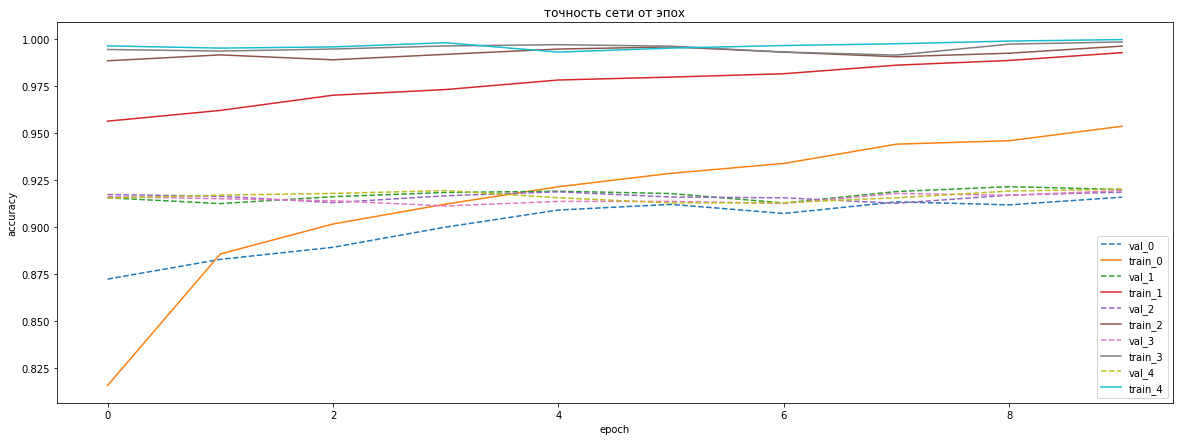

CPU times: user 41.4 s, sys: 5.53 s, total: 47 s
Wall time: 48.9 s


In [32]:
%%time
#ну и на последок... 
repeat = 5
history_list = dict()

input = layer.Input(shape=(28, 28, 1))

x = layer.Conv2D(28, (5, 5), strides=(1, 1), padding='same')(input)
x = layer.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same')(x)
x = layer.Conv2D(56, (5, 5), strides=(1, 1), padding='same')(x)
x = layer.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
x = layer.Flatten()(x)
x = layer.Dense(224, activation='tanh')(x)
x = layer.Dense(200, activation='tanh')(x)
x = layer.Dense(10, activation='softmax')(x)

#Надеюсь правильно срисовал, да для другого набора эта сеть

num_test = 11
statistic = model_compile(input, x, note='Сеть от умных людей', num_test=num_test, statistic=statistic, batch_size=200)

In [33]:
#Срисовал сеть я похоже не совсем правильно, но... точность то такая же как и на 10 эксперименте, а параметров 400,818 в отличии от 12,851,018 что позволяет ей быстрее работать.

In [34]:
for i in statistic:
    print(f'Номер испытания: {i:2}', end=' ')
    print(f'val_accuracy: {statistic[i]["val_accuracy"]:2.4f}', end=' ')
    print(f'accuracy: {statistic[i]["accuracy"]:2.4f}', end=' ')
    print(f'примечание: {statistic[i]["note"]}')

Номер испытания:  1 val_accuracy: 0.8947 accuracy: 0.9427 примечание: Изначальная сеть
Номер испытания:  2 val_accuracy: 0.8963 accuracy: 0.9578 примечание: Уменьшил кол-во нейронов
Номер испытания:  3 val_accuracy: 0.8978 accuracy: 0.9866 примечание: Уменьшил кол-во нейронов
Номер испытания:  4 val_accuracy: 0.8949 accuracy: 0.9785 примечание: Добавил парочку слоёв
Номер испытания:  5 val_accuracy: 0.8912 accuracy: 0.9731 примечание: поперебираем функции распределения
Номер испытания:  6 val_accuracy: 0.8528 accuracy: 0.8691 примечание: Меняем функции распределения на одном слое (linear)
Номер испытания:  7 val_accuracy: 0.8902 accuracy: 0.9472 примечание: Меняем функции распределения на одном слое (tanh)
Номер испытания:  8 val_accuracy: 0.9102 accuracy: 1.0000 примечание: Добавил сверточный слой
Номер испытания:  9 val_accuracy: 0.8867 accuracy: 0.9709 примечание: Добавил макспулинг
Номер испытания: 10 val_accuracy: 0.9230 accuracy: 0.9998 примечание: Сверточный слой и макспулинг
Но

Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

Честно говоря ничего не придумал кроме как применить MaxPooling2D и Conv2D